#**Context**

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

They recently launched a feature where students/learners can come to their website and **check their probability of getting into the IVY league college**. This feature estimates the chances of graduate admission from an Indian perspective.


#**How can you help here?**

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also **help predict one's chances of admission given the rest of the variables**.


**Dataset:**

Dataset Link: jamboree_admission.csv


#**Column Profiling:**

Serial No. (Unique row ID)
GRE Scores (out of 340)
TOEFL Scores (out of 120)
University Rating (out of 5)
Statement of Purpose and Letter of Recommendation Strength (out of 5)
Undergraduate GPA (out of 10)
Research Experience (either 0 or 1)
Chance of Admit (ranging from 0 to 1)

#**Concept Used:**

Exploratory Data Analysis
Linear Regression

#**What does good looks like?**

1.   Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.
2.   Drop the unique row Identifier if you see any. This step is important as you don’t want your model to build some understanding based on row numbers.
3.   Use Non-graphical and graphical analysis for getting inferences about variables.This can be done by checking the distribution of variables of graduate applicants.
4.   Once you’ve ensured that students with varied merit apply for the university, you can start understanding the relationship between different factors responsible for graduate admissions.
5.   Check correlation among independent variables and how they interact with each other.
6.   Use Linear Regression from (Statsmodel library) and explain the results.
7.   Test the assumptions of linear regression:

*   Multicollinearity check by VIF score
*   Mean of residuals
*   Linearity of variables (no pattern in residual plot)
*   Test for Homoscedasticity
*   Normality of residuals

8.   Do model evaluation- MAE, RMSE, R2 score, Adjusted R2.
9.   Provide actionable Insights & Recommendations
10.  Try out different Linear Regressions

# **Evaluation Criteria (100 Points):**

*   **Define Problem Statement and perform Exploratory Data Analysis (10 points)**
Definition of problem (as per given problem statement with additional views)
Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.
Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.
Illustrate the insights based on EDA
Comments on range of attributes, outliers of various attributes
Comments on the distribution of the variables and relationship between them
Comments for each univariate and bivariate plots
*   **Data Preprocessing (10 Points)**
Duplicate value check
Missing value treatment
Outlier treatment
Feature engineering
Data preparation for modeling
*   **Model building (10 Points)**
Build the Linear Regression model and comment on the model statistics
Display model coefficients with column names
Try out Ridge and Lasso regression
*   **Testing the assumptions of the linear regression model (50 Points)**
Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5) (10 Points)
The mean of residuals is nearly zero (10 Points)
Linearity of variables (no pattern in the residual plot) (10 Points)
Test for Homoscedasticity (10 Points)
Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line) (10 Points)
*   **Model performance evaluation (10 Points)**
Metrics checked - MAE, RMSE, R2, Adj R2
Train and test performances are checked
Comments on the performance measures and if there is any need to improve the model or not
*   **Actionable Insights & Recommendations (10 Points)**
Comments on significance of predictor variables
Comments on additional data sources for model improvement, model implementation in real world, potential business benefits from improving the model (These are key to differentiating a good and an excellent solution)

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/sample_data/Jamboree_Admission.csv')

In [2]:
df.shape

(500, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
# Drop 'Serial No.' column & create a new df_copy
df_copy = df.drop('Serial No.', axis=1)

No missing values & outliers (all values within a specific range)

In [7]:
# Find correlation
df_copy.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<Axes: >

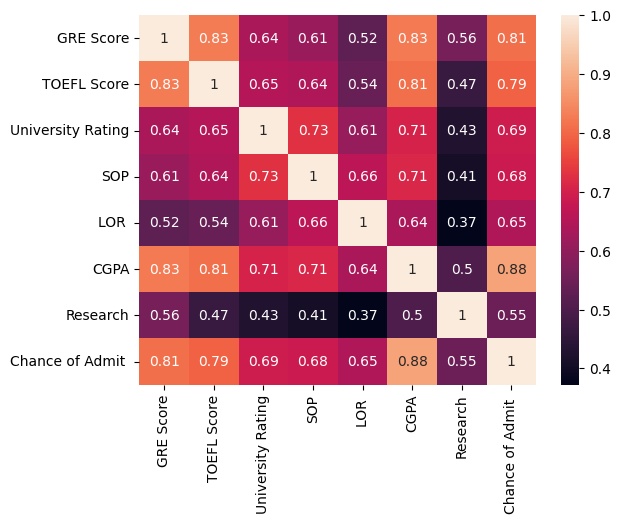

In [8]:
# Create heatmap of correlation
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_copy.corr(), annot=True)

Chance of Admit is positively correlated with all factors. Top 3 factors - CGPA, GRE Score, TOEFL Score

array([[<Axes: title={'center': 'GRE Score'}>,
        <Axes: title={'center': 'TOEFL Score'}>,
        <Axes: title={'center': 'University Rating'}>],
       [<Axes: title={'center': 'SOP'}>,
        <Axes: title={'center': 'LOR '}>,
        <Axes: title={'center': 'CGPA'}>],
       [<Axes: title={'center': 'Research'}>,
        <Axes: title={'center': 'Chance of Admit '}>, <Axes: >]],
      dtype=object)

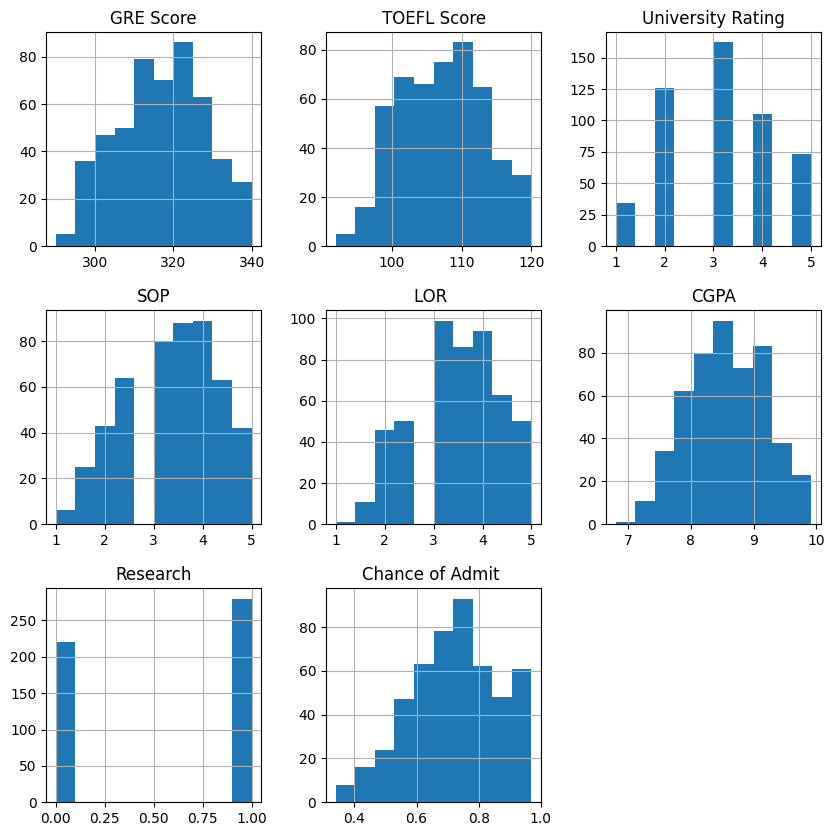

In [9]:
# Univariate analysis - Plot distribution of each factor
df_copy.hist(figsize=(10,10))

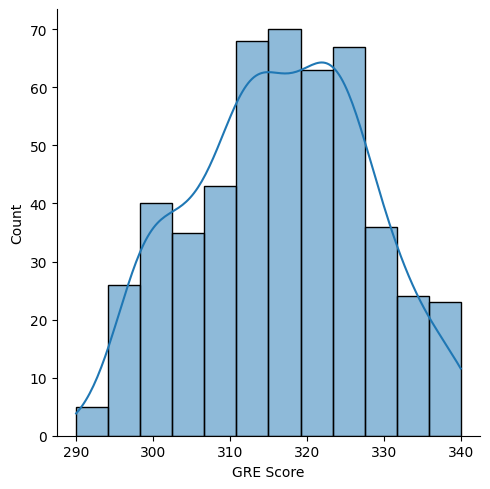

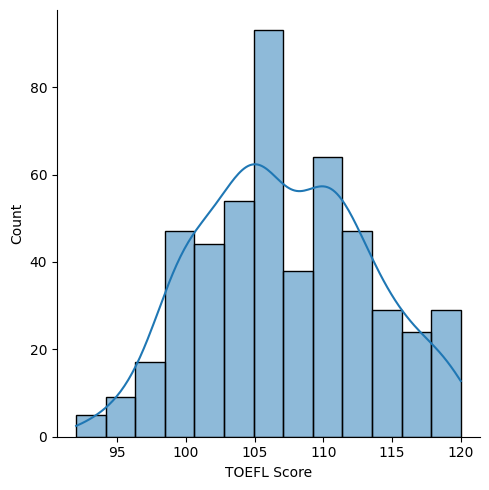

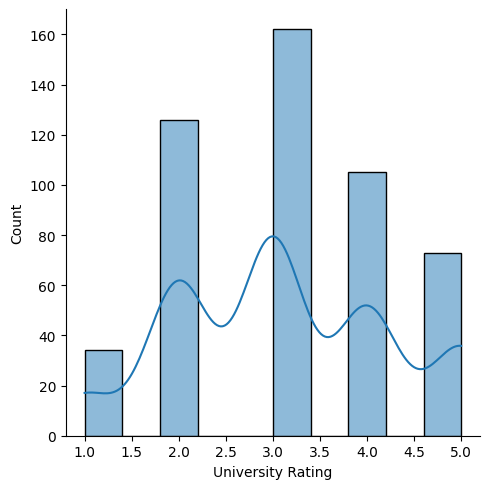

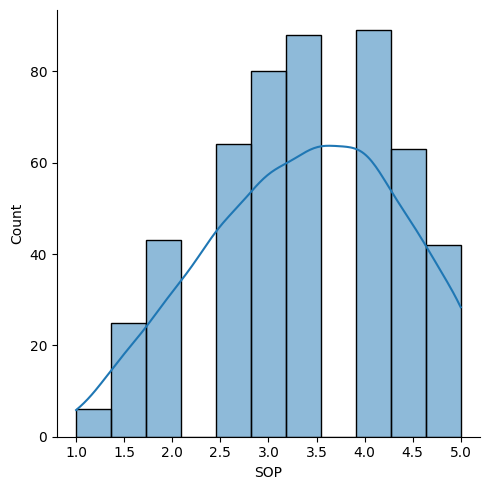

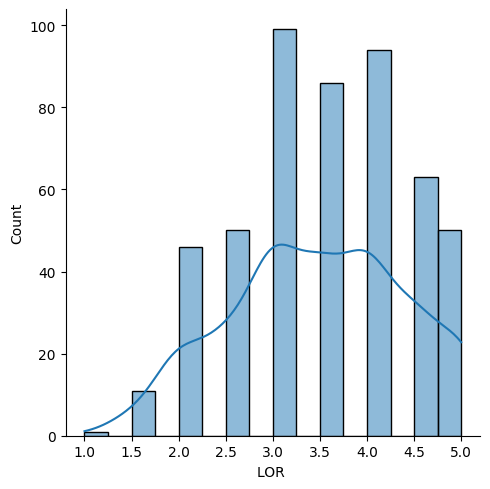

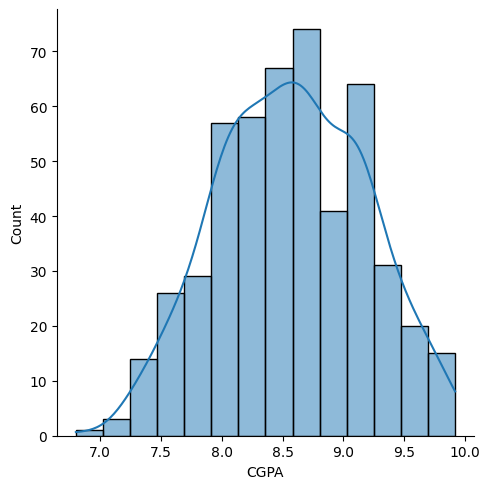

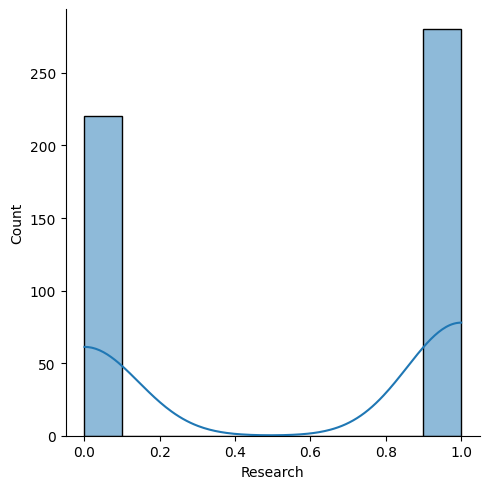

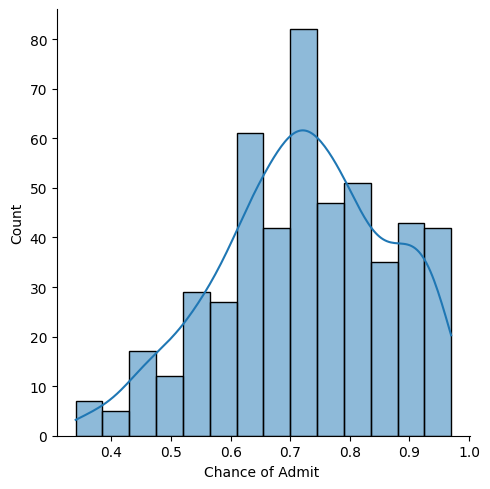

In [10]:
# Dist plot of all columns
for col in df_copy.columns:
  sns.displot(df_copy[col], kde=True)
  plt.show()

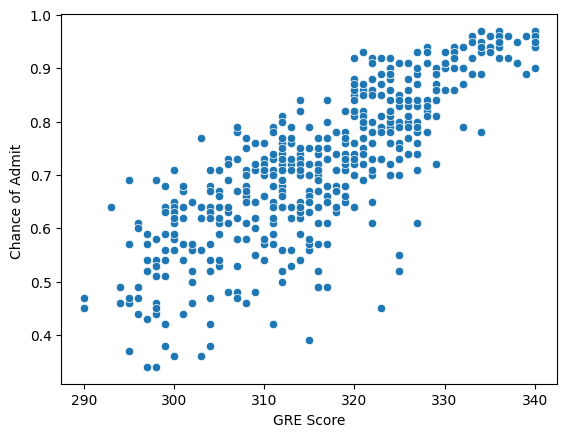

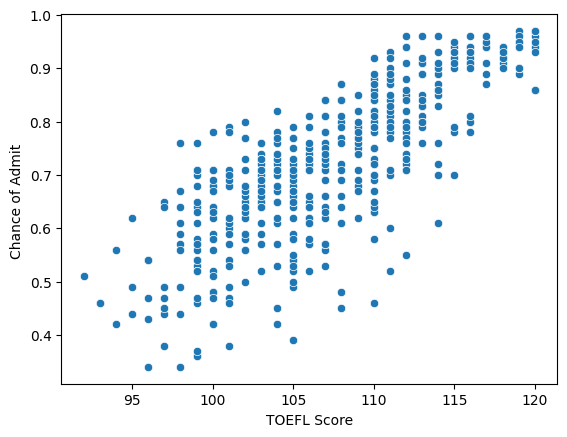

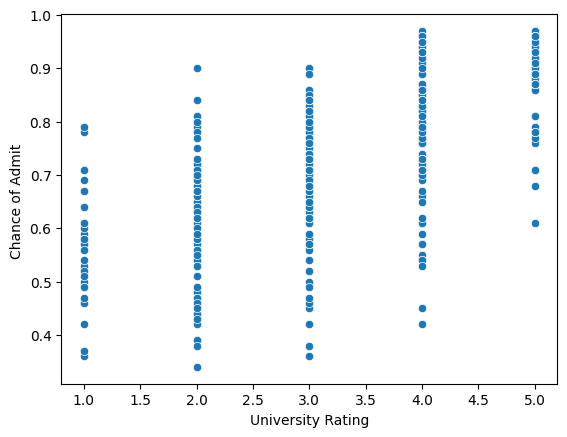

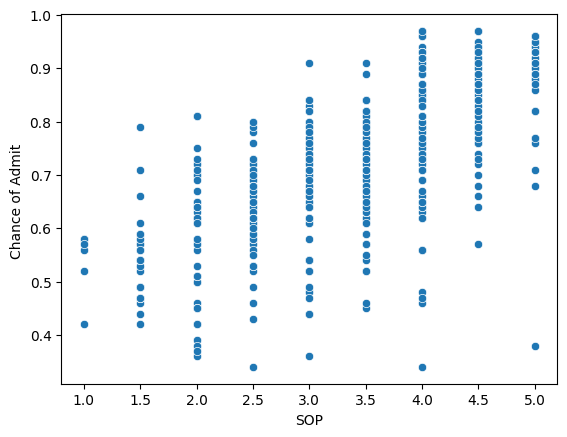

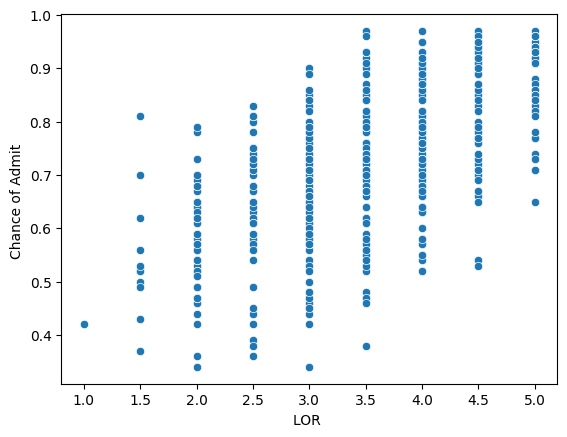

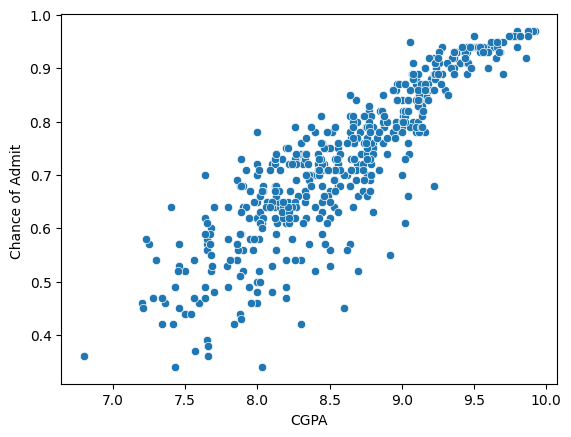

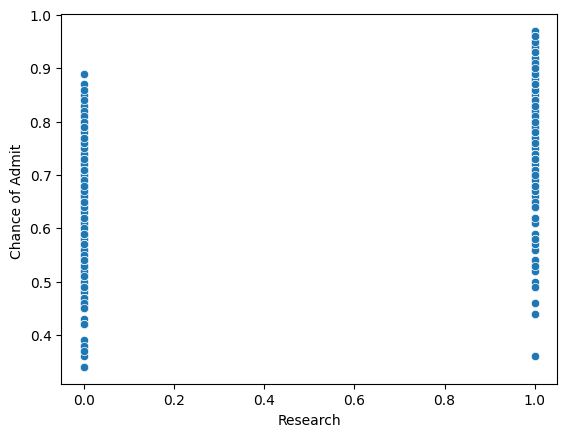

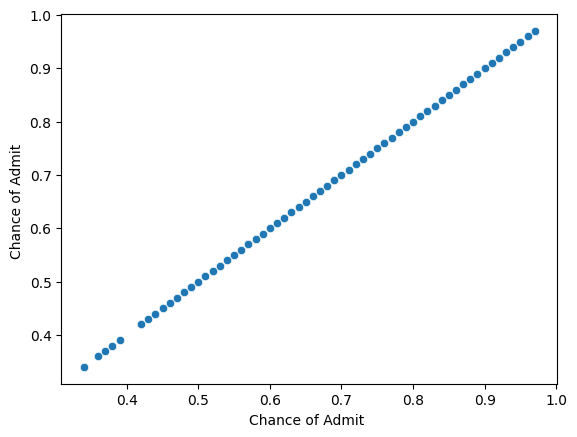

In [11]:
# Bivariate analysis - Check how 'Chance of Admit' vs each factor plot
for col in df_copy.columns:
  sns.scatterplot(x=df_copy[col], y=df_copy['Chance of Admit '])
  plt.show()

In [12]:
# 2. Data Preprocessing

# Duplicate value check
df_copy.duplicated().sum()

np.int64(0)

In [13]:
# Missing values
df_copy.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


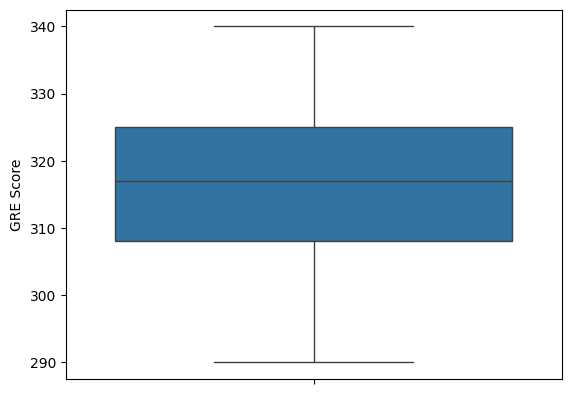

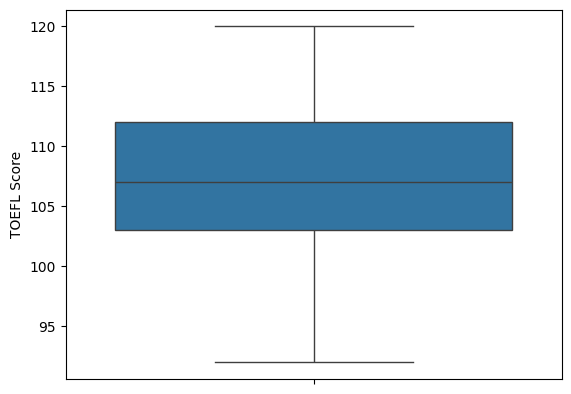

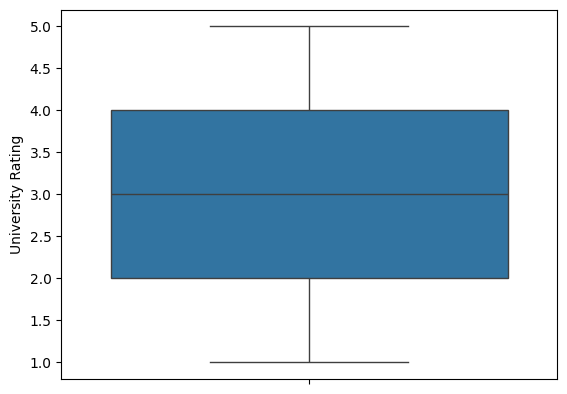

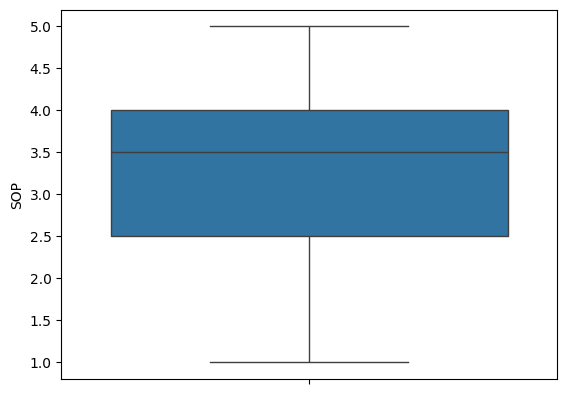

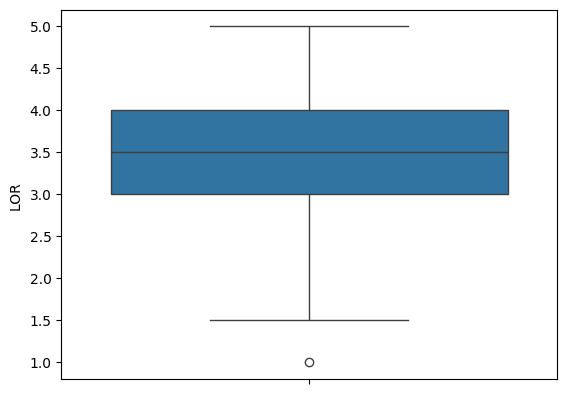

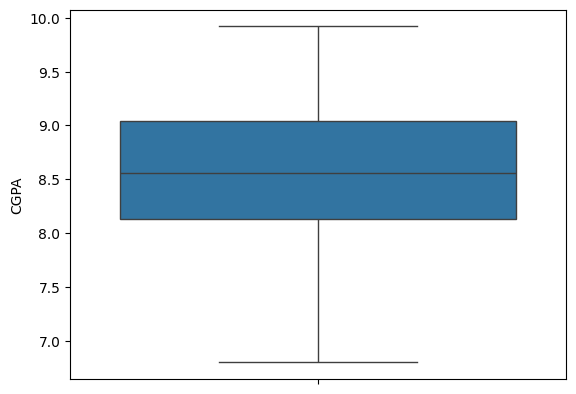

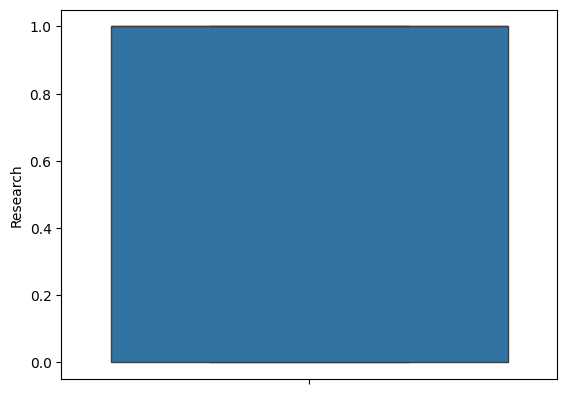

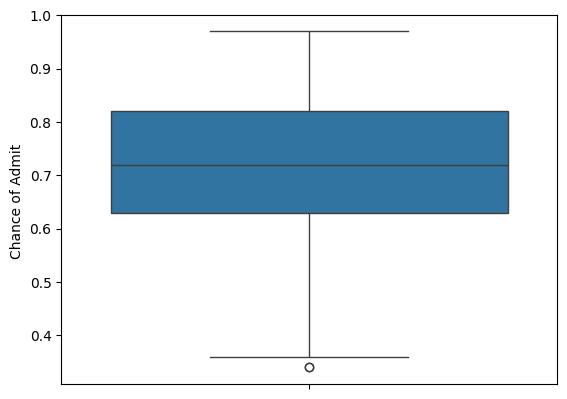

In [14]:
# Outlier treatment - Find outliers in each column using boxplot
for col in df_copy.columns:
  sns.boxplot(df_copy[col])
  plt.show()

In [15]:
# 3. Model Building

# Build linear regression model & comment on model statistics
# Display model coefficients with column names
# Try out Ridge & Lasso regression

# Build linear regresssion model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df_copy.drop('Chance of Admit ', axis=1)
y = df_copy['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Model statistics
print(f"MAE: {mean_absolute_error(y_test, y_pred): .2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)): .2f}")
print(f"R2: {r2_score(y_test, y_pred): .2f}")

# Display model coefficients with column names
print(f"Coefficients: {lr.coef_}")
print(f"Intercept: {lr.intercept_: .2f}")

MAE:  0.04
RMSE:  0.06
R2:  0.82
Coefficients: [0.00243444 0.00299587 0.0025688  0.00181369 0.01723798 0.11252708
 0.02402679]
Intercept: -1.42


In [16]:
# Applying standard scaling & then apply Linear regression

# Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Model statistics after scaling
print(f"\nModel statistics after scaling")
print(f"MAE: {mean_absolute_error(y_test, y_pred): .2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)): .2f}")
print(f"R2: {r2_score(y_test, y_pred): .2f}")

# Display model coefficients with column names
print(f"Coefficients: {lr.coef_}")
print(f"Intercept: {lr.intercept_: .2f}")


Model statistics after scaling
MAE:  0.04
RMSE:  0.06
R2:  0.82
Coefficients: [0.02746983 0.01820228 0.00293451 0.00179558 0.01593692 0.06798973
 0.01192658]
Intercept:  0.72


In [17]:
df_copy.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
# Print min & max value in each column of X_scaled
for i in range(X_scaled.shape[1]):
  print(f"Min value: {np.min(X_scaled[:,i]): .2f}, Max value: {np.max(X_scaled[:,i]): .2f}")

Min value: -2.35, Max value:  2.09
Min value: -2.50, Max value:  2.11
Min value: -1.85, Max value:  1.65
Min value: -2.40, Max value:  1.64
Min value: -2.69, Max value:  1.64
Min value: -2.94, Max value:  2.22
Min value: -1.13, Max value:  0.89


In [19]:
# Feature importance - feature (col name) vs its importance (coefficient value)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': lr.coef_})
feature_importance.sort_values(by='Importance', ascending=False)
print(f"Feature importance: \n")

# Print feature vs coef value with 2 decimal points
for i in range(len(lr.coef_)):
  print(f"{X.columns[i]}: {lr.coef_[i]:.2f}")


Feature importance: 

GRE Score: 0.03
TOEFL Score: 0.02
University Rating: 0.00
SOP: 0.00
LOR : 0.02
CGPA: 0.07
Research: 0.01


In [20]:
# Apply Ridge linear regression to df_copy dataframe
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline

ridge_lr = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge_lr.fit(X_train, y_train)
y_pred = ridge_lr.predict(X_test)

# Model statistics with ridge linear regression
print(f"\nModel statistics with ridge linear regression")
print(f"MAE: {mean_absolute_error(y_test, y_pred): .2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)): .2f}")
print(f"R2: {r2_score(y_test, y_pred): .2f}")

# Display model coeffiecients with column names
print(f"Coefficients: {ridge_lr.named_steps['ridge'].coef_}")
print(f"Intercept: {ridge_lr.named_steps['ridge'].intercept_: .2f}")



Model statistics with ridge linear regression
MAE:  0.04
RMSE:  0.06
R2:  0.82
Coefficients: [0.02678933 0.01835467 0.00304573 0.00193688 0.01589255 0.06701137
 0.01194936]
Intercept:  0.72


In [21]:
# Apply Lasso linear regression
lasso_lr = make_pipeline(StandardScaler(), Lasso(alpha=1))
lasso_lr.fit(X_train, y_train)
y_pred = lasso_lr.predict(X_test)

# Model statistics with lasso linear regression
print(f"\nModel statistics with lasso linear regression")
print(f"MAE: {mean_absolute_error(y_test, y_pred): .2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)): .2f}")
print(f"R2: {r2_score(y_test, y_pred): .2f}")

# Display model coefficients with column names
print(f"Coefficients: {lasso_lr.named_steps['lasso'].coef_}")
print(f"Intercept: {lasso_lr.named_steps['lasso'].intercept_: .2f}")


Model statistics with lasso linear regression
MAE:  0.12
RMSE:  0.14
R2: -0.01
Coefficients: [0. 0. 0. 0. 0. 0. 0.]
Intercept:  0.72


In [22]:
# Find optimal alpha value for Lasso
from sklearn.linear_model import LassoCV

lasso_cv = make_pipeline(
    StandardScaler(),
    LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1.0], cv=5)
)
lasso_cv.fit(X_train, y_train)
print("Best alpha:", lasso_cv.named_steps['lassocv'].alpha_)

y_pred = lasso_lr.predict(X_test)

# Model statistics with lasso linear regression
print(f"\nModel statistics with lasso linear regression")
print(f"MAE: {mean_absolute_error(y_test, y_pred): .2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)): .2f}")
print(f"R2: {r2_score(y_test, y_pred): .2f}")

# Display column coefficients to see feature importance
print(f"Coefficients: {lasso_cv.named_steps['lassocv'].coef_}")
print(f"Intercept: {lasso_cv.named_steps['lassocv'].intercept_: .2f}")

Best alpha: 0.001

Model statistics with lasso linear regression
MAE:  0.12
RMSE:  0.14
R2: -0.01
Coefficients: [0.02661236 0.01791855 0.00274603 0.00159205 0.01539165 0.06773355
 0.01135986]
Intercept:  0.72


In [23]:
# 4. Testing the assumptions of linear regression model

# Multi-colinearity check by VIF score
# Mean of residuals is nearly zero
# Linearity of variables
# Test for homoscedasity
# Normality of residuals

# Check multi colinearity by VIF score

# Calculate VIF in pandas
from statsmodels.stats.outliers_influence import variance_inflation_factor
'''
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)
'''

'\nvif = pd.DataFrame()\nvif["Features"] = X.columns\nvif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\nprint(vif)\n'

In [24]:
X.shape

(500, 7)

In [25]:
from statsmodels.tools.tools import add_constant

X_const = add_constant(X)

vif = pd.DataFrame()
vif['Features'] = X_const.columns
vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print(vif)

            Features          VIF
0              const  1511.495830
1          GRE Score     4.464249
2        TOEFL Score     3.904213
3  University Rating     2.621036
4                SOP     2.835210
5               LOR      2.033555
6               CGPA     4.777992
7           Research     1.494008


**Multi-colinearity check with VIF scores** - No major colinearity issues. All the features have VIF score < 5, so reasonably independent with each adding its own unique value to the prediction. CGPA, GRE Score & TOEFL Score show moderate correlation but within acceptable range.

In [26]:
# Mean of residuals is nearly zero - check
y_pred = lr.predict(X_test)
print(f"Mean of residuals: {np.mean(y_test - y_pred)}")

Mean of residuals: -0.0054536237176613465


**Mean of residuals** - is nearly zero (-0.0055) & so the model is unbiased

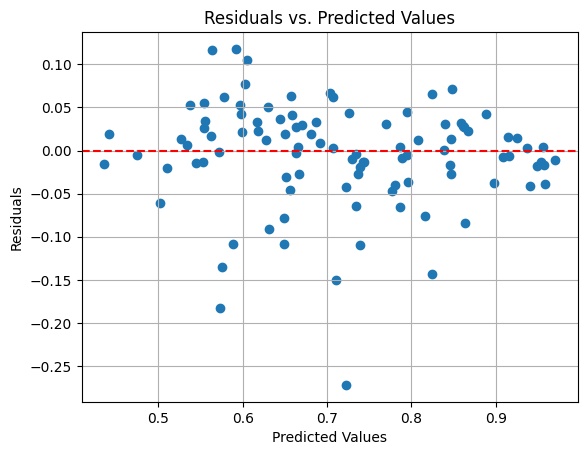

In [27]:
# Linearity of variables (no pattern in the residual plot)
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()

**Residual plot** - is roughly centered around zero (-0.0055) & are random noise. No systematic pattern in residuals & so non-linear relationship.

Variance of residuals: 0.003674913387134572


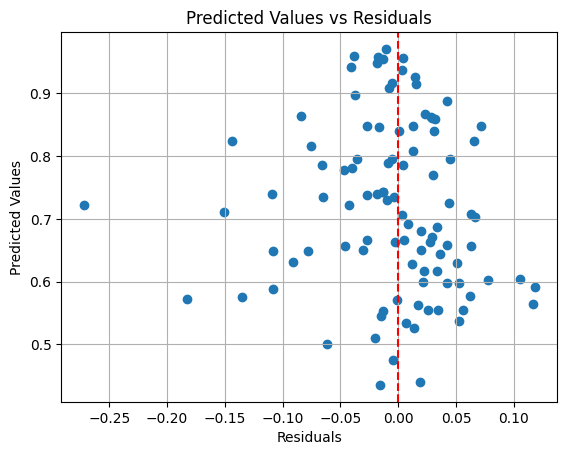

In [28]:
# Test for homoscedasticity

# Find variance of residuals
print(f"Variance of residuals: {np.var(residuals)}")

# Visually inspect variance & look for any pattern
plt.scatter(residuals, y_pred)
plt.ylabel('Predicted Values')
plt.xlabel('Residuals')
plt.title('Predicted Values vs Residuals')
plt.axvline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()

In [33]:
# Formally test for homoscadesticity using breusch-pagan test
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

X_test_const = add_constant(X_test)

# Residuals and features with constant
bp_test = het_breuschpagan(residuals, X_test_const)

labels = ['LM stat', 'LM p-value', 'F-stat', 'F p-value']
print(dict(zip(labels, bp_test)))

{'LM stat': np.float64(8.319751775349582), 'LM p-value': np.float64(0.3052446173035347), 'F-stat': np.float64(1.1926812063108225), 'F p-value': np.float64(0.3148412509041601)}


**Homoscedasticity check using Residuals variance** - spread is not drastically increasing or decreasing, it is mostly in the range (-0.10 to +0.10) except for 11 out of 100 residuals. There is a slightly more spread around 0.6-0.7 than at the ends. Variance is roughly equal across all predicted values & so suggests approximate homoscedasticity.

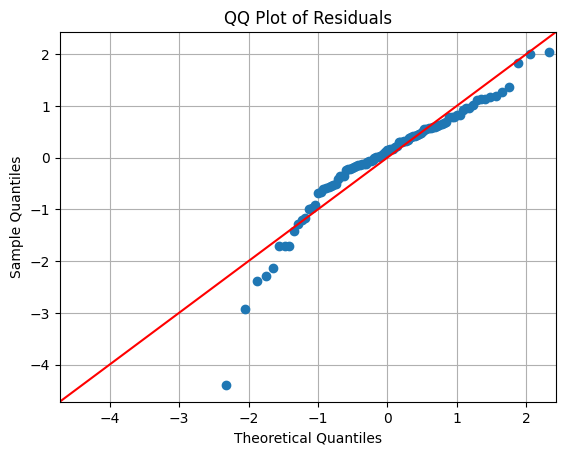

In [34]:
# Normality of residuals - check for bell shaped curve in residuals distribution plot using QQ plot
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.grid(True)
plt.show()


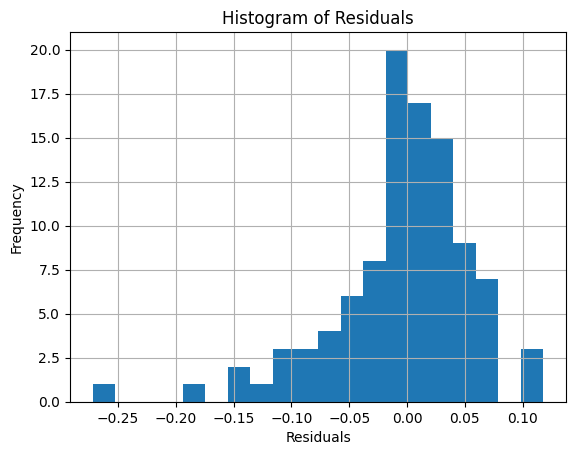

In [35]:
# Histogram of residuals
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [36]:
# Try remove outliers from residuals & replotting
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

In [72]:
# Try IQR method to filter residuals & replot QQ and histogram to check for normality
q1 = np.percentile(residuals, 25)
q3 = np.percentile(residuals, 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

mask = (residuals >= lower_bound) & (residuals <= upper_bound)

% of residuals filtered:  6%


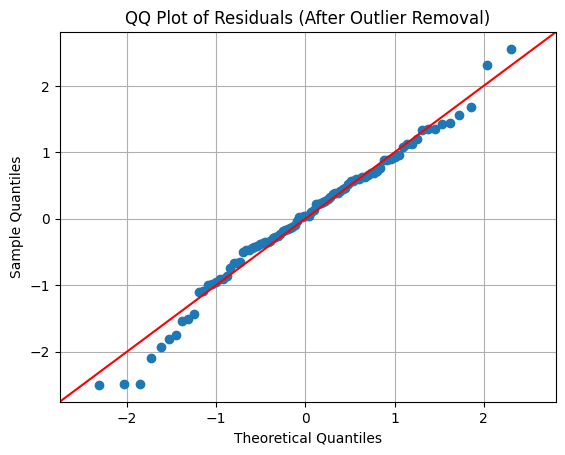

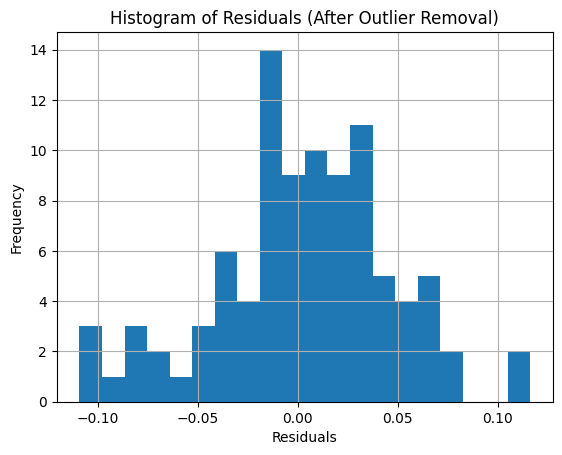

In [73]:
X_test_filtered = X_test[mask]
y_test_filtered = y_test[mask]
y_pred_filtered = y_pred[mask]
residuals_filtered = residuals[mask]

print(f"% of residuals filtered: {(1 - (X_test_filtered.shape[0]/len(residuals))) * 100: .0f}%")

# QQ plot
sm.qqplot(residuals_filtered, line='45', fit=True)
plt.title("QQ Plot of Residuals (After Outlier Removal)")
plt.grid(True)
plt.show()

# Histogram
plt.hist(residuals_filtered, bins=20)
plt.title("Histogram of Residuals (After Outlier Removal)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

**Normality of residuals** - There is a slight left skew in the residuals distribution. After removing 6% of datapoints using IQR method, the QQ plot & histogram - show residuals are approximately normally distributed with slight distortions at the edges. These small deviations are within acceptable limits and do not raise concerns for the assumptions of linear regression.

In [78]:
# 5. Model performance evaluation (10 Points)

# Metrics checked - MAE, RMSE, R2, Adj R2
# Train and test performances are checked
# Comments on the performance measures and if there is any need to improve the model or not

# Model statistics for test data
print(f"MAE: {mean_absolute_error(y_test, y_pred): .2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)): .2f}")
print(f"R2: {r2_score(y_test, y_pred): .2f}")

MAE:  0.04
RMSE:  0.06
R2:  0.82


In [79]:
# Function to compute adjusted R2 score
from sklearn.metrics import r2_score

def adjusted_r2_score(y_true, y_pred, n, k):
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [80]:
y_train_pred = lr.predict(X_train)

n_train = X_train.shape[0]
k = X_train.shape[1]
adj_r2_train = adjusted_r2_score(y_train, y_train_pred, n_train, k)

n_test = X_test.shape[0]
adj_r2_test = adjusted_r2_score(y_test, y_pred, n_test, k)

print(f"Adjusted R2 score for train data: {adj_r2_train: .2f}")
print(f"Adjusted R2 score for test data: {adj_r2_test: .2f}")

Adjusted R2 score for train data:  0.82
Adjusted R2 score for test data:  0.81


In [81]:
# MAE, RMSE & R2 - for train data
print(f"MAE (train): {mean_absolute_error(y_train, y_train_pred): .2f}")
print(f"RMSE (train): {np.sqrt(mean_squared_error(y_train, y_train_pred)): .2f}")
print(f"R2 (train): {r2_score(y_train, y_train_pred): .2f}")

MAE (train):  0.04
RMSE (train):  0.06
R2 (train):  0.82


In [88]:
import numpy as np
from sklearn.metrics import r2_score

# Baseline prediction: predict mean of y_test for all values
y_baseline = np.full_like(y_test, fill_value=np.mean(y_test))

# R2 score of baseline
r2_baseline = r2_score(y_test, y_baseline)
print(f"Baseline R2 Score: {r2_baseline:.2f}")


Baseline R2 Score: 0.00


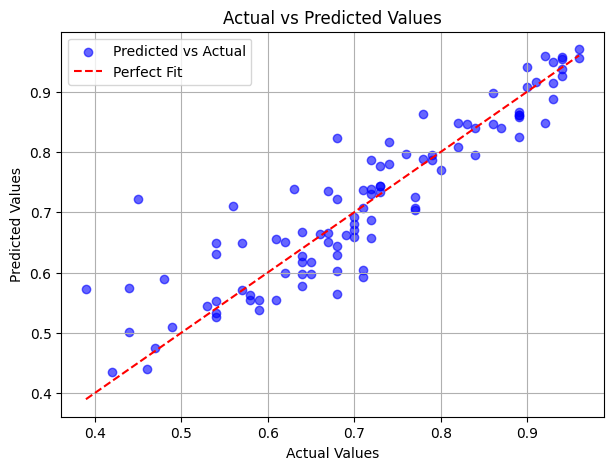

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()


**Model Performance Evaluation** - The model's MAE, RMSE, R², and Adjusted R² scores are consistent across both train and test datasets, indicating that the model generalizes well to unseen data without signs of overfitting.

An R² score of 0.82 on the test data shows that **the model successfully captures 82% of the variance in admission chances**, which is considered fairly accurate for our use case of predicting chance of admission to Ivy League colleges.

**Actionable Insights & Recommendations:**

*   Comments on significance of predictor variables: CGPA, GRE & TOEFL scores are key factors that significantly impact the chance of admission of a student into an ivy league college.
*   Comments on additional data sources for model improvement, model implementation in real world

In [89]:
df_copy.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [104]:
# Group by university rating & find minimum cutoff scores for each factor
df_copy.groupby('University Rating').agg({'CGPA' : 'min',
                                          'GRE Score' : 'min',
                                          'TOEFL Score' : 'min',
                                          'SOP' : 'min',
                                          'LOR ' : 'min',
                                          'Research' : 'mean',
                                          'Chance of Admit ' : 'min'})

,CGPA,GRE Score,TOEFL Score,SOP,LOR,Research,Chance of Admit
University Rating,,,,,,,
1,6.80,290,92,1.0,1.0,0.294118,0.36
2,7.21,293,94,1.0,1.5,0.293651,0.34
3,7.40,297,97,2.0,1.5,0.537037,0.36
4,7.46,290,96,1.5,2.0,0.780952,0.42
5,7.92,303,101,3.0,3.0,0.876712,0.61


In [105]:
# Group by university rating & find mean cutoff scores for each factor
df_copy.groupby('University Rating').agg({
    'CGPA': 'mean',
    'GRE Score': 'mean',
    'TOEFL Score': 'mean',
    'SOP': 'mean',
    'LOR ': 'mean',
    'Research': 'mean',
    'Chance of Admit ': 'mean'
})



,CGPA,GRE Score,TOEFL Score,SOP,LOR,Research,Chance of Admit
University Rating,,,,,,,
1,7.798529,304.911765,100.205882,1.941176,2.426471,0.294118,0.562059
2,8.177778,309.134921,103.444444,2.682540,2.956349,0.293651,0.626111
3,8.500123,315.030864,106.314815,3.308642,3.401235,0.537037,0.702901
4,8.936667,323.304762,110.961905,4.000000,3.947619,0.780952,0.801619
5,9.278082,327.890411,113.438356,4.479452,4.404110,0.876712,0.888082


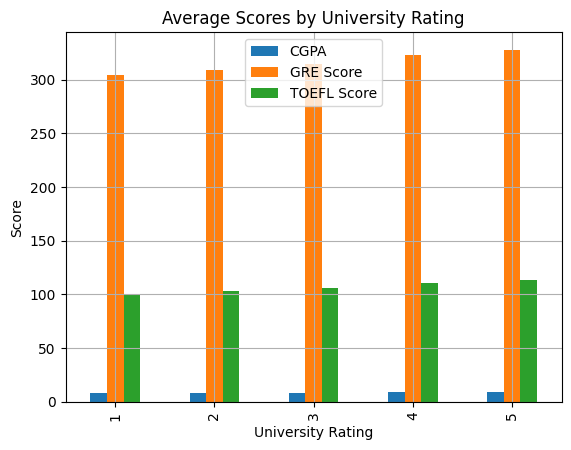

In [108]:

# Visualize changing scores for each university rating
df_copy.groupby('University Rating')[['CGPA', 'GRE Score', 'TOEFL Score']].mean().plot(kind='bar')
plt.title("Average Scores by University Rating")
plt.ylabel("Score")
plt.grid(True)
plt.show()

In [114]:
df_summary = df_copy.groupby('University Rating').agg({
    'CGPA': ['min', 'median'],
    'GRE Score': ['min', 'median'],
    'TOEFL Score': ['min', 'median'],
    'SOP': ['min', 'median'],
    'LOR ': ['min', 'median'],
    'Research': ['mean'],  # only mean is meaningful for binary
    'Chance of Admit ': ['min', 'median']
})
df_summary

CGPA        GRE Score        TOEFL Score         SOP  \
                    min median       min median         min median  min   
University Rating                                                         
1                  6.80  7.740       290  301.5          92   99.0  1.0   
2                  7.21  8.170       293  309.0          94  104.0  1.0   
3                  7.40  8.545       297  316.0          97  106.0  2.0   
4                  7.46  9.020       290  325.0          96  111.0  1.5   
5                  7.92  9.300       303  330.0         101  114.0  3.0   

                         LOR          Research Chance of Admit          
                  median  min median      mean              min median  
University Rating                                                       
1                    2.0  1.0   2.25  0.294118             0.36   0.57  
2                    2.5  1.5   3.00  0.293651             0.34   0.64  
3                    3.5  1.5   3.50  0.537037             0.36   0.72  
4                    4.0  2.0   4.00  0.780952             0.42   0.82  
5                    4.5  3.0   4.50  0.876712             0.61   0.91

In [99]:
# Were there rows that had same student's chance of admission in different universities
df['Serial No.'].value_counts()

,count
Serial No.,
500,1
1,1
2,1
3,1
484,1
...,...
9,1
8,1
7,1


In [100]:
df_copy.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**Actionable Insights & Recommendations**
*   CGPA, GRE, and TOEFL are the most significant predictors of admission.

*   Higher-rated universities have higher median scores across all parameters.

    *   GRE: ~301 (Rating 1) → ~330 (Rating 5)

    *   CGPA: ~7.7 → ~9.3

    *   TOEFL: ~99 → ~114

*   Research experience becomes more important as university rating increases (from ~29% to ~88%).

**Model Improvement Suggestions**
*   Add more data points (information on more student application across years) to improve generalization & reduce overfitting.

*   Identify & add more richer features like internships, community service etc that actually helped students get through to ivy colleges

**Real-World Implementation**
This model can be integrated into Jamboree’s student counseling platform as a **personalized admission predictor**:

*   Advisors can guide students on which universities are realistic, ambitious, or safe.

*   Students can simulate profile changes and instantly see how their predicted admission chances are affected.

*   Filters can help students shortlist universities aligned with their goals and budget.

**Business Impact**
*   ***Higher student satisfaction*** - by minimizing rejections and optimizing application strategy. It can help them shortlist universities better, avoid wasting money on low-probability applications

*   ***Increased conversions to paid services*** - like SOP review, mock interviews, and GRE prep -  based on gaps in a student’s profile. It makes the guidance process more data-driven and personal, which is exactly what students look for when making big decisions like study abroad.
